In [74]:
import glob

import math
from math import sqrt

from bs4 import BeautifulSoup

import pandas as pd

In [75]:
labels=glob.glob('E:\\dataset\\DataSet-main\\DataSet-main\\train\\labels\\*.xml')
# *是正则表达式, 表示匹配0个或多个的表达式 这里表示的是全部的xml文件。只要满足前面的条件都是匹配的。glob 是抓取路径文件

In [76]:
gt_label=["Airplane","Ship","Vehicle","Basketball Court","Tennis Court","Football field","Baseball field","Intersection","Roundabout","Bridge"]
list_nummers = []

In [77]:
def read(label):
    xmlfile=open(label,'r')
    xml = xmlfile.read()
    soup = BeautifulSoup(xml, "xml")
    return soup

In [78]:
def extract(point):
    p = point.string
    x = float(p.split(',')[0])
    y = float(p.split(',')[1])
    return (x,y)

In [79]:
def calculate(p_coordinate):
    width = sqrt(math.pow(p_coordinate[0][0]-p_coordinate[1][0],2)+(math.pow(p_coordinate[0][1]-p_coordinate[1][1],2)))
    length = sqrt(math.pow(p_coordinate[1][0]-p_coordinate[2][0],2)+(math.pow(p_coordinate[1][1]-p_coordinate[2][1],2)))
    size = width * length
    if length>=width:
        Aspect_ratio = length / width
    else:
        Aspect_ratio = width / length
    return size,Aspect_ratio

In [80]:
for label in labels:
    soup = read(label)
    list_catagory = []
    list_nummer = []
    # soup 就是xml文件中的全部信息
    object_list = soup.annotation.objects.find_all('object')
    for object in object_list:
        print(object.possibleresult.find('name').string)
        points = object.points.find_all('point')
        p_coordinate = []
        for point in points[:3]:
            # print(point.string)
            p_coordinate.append(extract(point))
        size,Aspect_ratio= calculate(p_coordinate)
        print(size)
        print(Aspect_ratio)
        # 把name 变成字符串
        list_catagory.append(object.possibleresult.find('name').string)
    list_catagory.count(object.possibleresult.find('name').string)
    for gt in gt_label:
        list_nummer.append(list_catagory.count(gt))
    list_nummers.append(list_nummer)

Vehicle
89.05054744357274
1.3700084222088116
Vehicle
144.0
1.7777777777777777
Vehicle
160.31219541881399
1.6031219541881399
Vehicle
127.09838708654017
1.5499803303236603
Vehicle
135.0
1.6666666666666667
Vehicle
189.12958520548813
1.9298937265866136
Vehicle
183.0027322200409
2.1529733202357755
Vehicle
125.89678312014173
2.5179356624028344
Vehicle
90.55385138137417
2.208630521496931
Vehicle
131.52946437965906
2.630589287593181
Vehicle
132.5443322062471
2.172857905020445
Vehicle
133.00375934536586
2.1803894974650144
Vehicle
149.2146105446782
2.446141156470135
Vehicle
492.0365840057018
2.1868292622475636
Vehicle
128.39003076563228
2.469039053185236
Vehicle
115.10864433221339
2.3021728866442674
Intersection
2940.0170067535323
1.3486316544740975
Vehicle
149.2146105446782
2.446141156470135
Vehicle
115.97413504743204
2.3194827009486407
Vehicle
128.09761902549167
2.099960967631011
Vehicle
76.1051903617618
2.378287198805056
Vehicle
84.8528137423857
2.651650429449553
Vehicle
146.01369798755184
1.

Vehicle
143.0314650697531
2.698706888108549
Vehicle
144.22205101855957
2.884441020371191
Vehicle
181.8928255869373
2.798351162875959
Vehicle
118.1058846967415
3.192050937749771
Vehicle
127.27922061357856
2.82842712474619
Vehicle
125.39936203984452
3.389171947022825
Vehicle
148.48568954616468
2.8016167838898998
Vehicle
166.43316977093238
3.3286633954186473
Vehicle
123.01625908797584
3.3247637591344827
Vehicle
145.77379737113253
2.9154759474226504
Vehicle
156.2049935181331
3.1240998703626617
Vehicle
162.78820596099706
3.071475584169756
Vehicle
165.07574019219177
3.3015148038438356
Vehicle
130.38404810405297
2.6076809620810595
Vehicle
154.02921800749363
2.3696802770383636
Vehicle
157.00318468107582
3.1400636936215163
Vehicle
135.09256086106296
2.7018512172212588
Vehicle
122.26201372462339
3.304378749314146
Vehicle
137.29530217745983
2.745906043549196
Vehicle
109.65856099730654
2.963744891819096
Vehicle
126.0
3.5
Vehicle
140.1748907615055
2.8607120563572552
Vehicle
155.56349186104046
3.111

In [86]:
data=pd.read_excel(io=r'E:\\data.xlsx')

In [87]:
print(data.T)

                 0         1        2    3         4        5           6     \
Unnamed: 0        NaN       NaN      NaN  NaN       NaN      NaN         NaN   
Unnamed: 1        NaN       NaN      NaN  NaN       NaN      NaN         NaN   
Unnamed: 2        NaN       NaN      NaN  NaN       NaN      NaN         NaN   
Unnamed: 3        NaN       NaN      NaN  NaN       NaN      NaN         NaN   
Unnamed: 4        NaN       NaN      NaN  NaN       NaN      NaN         NaN   
Unnamed: 5        NaN       NaN      NaN  NaN       NaN      NaN         NaN   
Vehicle     89.050547  1.370008  Vehicle  144  1.777778  Vehicle  160.312195   

                7        8           9     ...  2630         2631      2632  \
Unnamed: 0       NaN      NaN         NaN  ...   NaN          NaN       NaN   
Unnamed: 1       NaN      NaN         NaN  ...   NaN          NaN       NaN   
Unnamed: 2       NaN      NaN         NaN  ...   NaN          NaN       NaN   
Unnamed: 3       NaN      NaN         NaN  

In [89]:
data.T.to_excel('E:\\excel_output.xlsx')

In [131]:
df=pd.read_excel('E:\\excel_output.xlsx')

In [132]:
print(df)

   Unnamed: 0          0         1        2      3         4        5  \
0  Unnamed: 0        NaN       NaN      NaN    NaN       NaN      NaN   
1  Unnamed: 1        NaN       NaN      NaN    NaN       NaN      NaN   
2  Unnamed: 2        NaN       NaN      NaN    NaN       NaN      NaN   
3  Unnamed: 3        NaN       NaN      NaN    NaN       NaN      NaN   
4  Unnamed: 4        NaN       NaN      NaN    NaN       NaN      NaN   
5  Unnamed: 5        NaN       NaN      NaN    NaN       NaN      NaN   
6     Vehicle  89.050547  1.370008  Vehicle  144.0  1.777778  Vehicle   

            6         7        8  ...      2629  2630         2631      2632  \
0         NaN       NaN      NaN  ...       NaN   NaN          NaN       NaN   
1         NaN       NaN      NaN  ...       NaN   NaN          NaN       NaN   
2         NaN       NaN      NaN  ...       NaN   NaN          NaN       NaN   
3         NaN       NaN      NaN  ...       NaN   NaN          NaN       NaN   
4         NaN  

In [151]:
name_list=[]
name_list_1=[]
name_list_2=[]
for j in range(df.shape[1]):
    if df.iloc[[6],[j]].values[0][0] == 'Vehicle':
        name_list.append(df.iloc[[6],[j]].values[0][0])
        name_list_1.append(df.iloc[[6],[j+1]].values[0][0])
        name_list_2.append(df.iloc[[6],[j+2]].values[0][0])

In [152]:
print(name_list)

['Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle', 'Vehicle'

In [153]:
print(name_list_1)

[89.0505474435727, 144.0, 160.312195418813, 127.09838708654, 135.0, 189.129585205488, 183.00273222004, 125.896783120141, 90.5538513813741, 131.529464379659, 132.544332206247, 133.003759345365, 149.214610544678, 492.036584005701, 128.390030765632, 115.108644332213, 149.214610544678, 115.974135047432, 128.097619025491, 76.1051903617618, 84.8528137423857, 146.013697987551, 122.262013724623, 102.176318195558, 181.176709319934, 153.160047009655, 171.0, 119.104995697073, 139.057542046449, 128.390030765632, 115.108644332213, 145.086181285469, 114.017542509913, 128.0, 129.999999999999, 106.301458127346, 126.063476074555, 149.345237620755, 107.004672795163, 225.179928057542, 260.276775759959, 228.019735987918, 157.079597656729, 163.027605024425, 923.146792227541, 150.0, 124.064499354166, 84.0, 98.2496819333274, 223.163617106373, 120.933866224478, 110.0181803158, 113.216606555752, 110.163514831363, 161.152102065098, 145.999999999999, 172.185946000247, 102.176318195558, 119.004201606497, 130.1383

In [154]:
print(name_list_2)

[1.37000842220881, 1.77777777777777, 1.60312195418813, 1.54998033032366, 1.66666666666666, 1.92989372658661, 2.15297332023577, 2.51793566240283, 2.20863052149693, 2.63058928759318, 2.17285790502044, 2.18038949746501, 2.44614115647013, 2.18682926224756, 2.46903905318523, 2.30217288664426, 2.44614115647013, 2.31948270094864, 2.09996096763101, 2.37828719880505, 2.65165042944955, 1.78065485350672, 3.30437874931414, 2.83823106098773, 2.78733398953745, 2.06973036499535, 2.11111111111111, 2.90499989505058, 2.27963183682703, 2.46903905318523, 2.30217288664426, 2.90172362570938, 2.19264504826757, 2.0, 2.0, 2.12602916254692, 2.17350820818198, 2.19625349442287, 2.14009345590326, 2.77999911182151, 2.2437653082755, 2.09192418337539, 2.15177531036615, 1.68069695901469, 4.6157339611377, 3.0, 2.38585575681089, 1.71428571428571, 2.00509554965974, 6.03144911098306, 2.68741924943284, 1.61791441640883, 1.95201045785779, 2.97739229273954, 3.04060569934148, 2.0, 2.53214626470951, 2.55440795488895, 1.6301945

In [155]:
from pandas.core.frame import DataFrame

In [156]:
c={"name_list" : name_list,
   "name_list_1" : name_list_1,
  "name_list_2" : name_list_2}#将列表a，b转换成字典
result=DataFrame(c)#将字典转换成为数据框
print(result)

    name_list  name_list_1  name_list_2
0     Vehicle    89.050547     1.370008
1     Vehicle   144.000000     1.777778
2     Vehicle   160.312195     1.603122
3     Vehicle   127.098387     1.549980
4     Vehicle   135.000000     1.666667
..        ...          ...          ...
767   Vehicle   135.000000     1.666667
768   Vehicle   299.041803     2.451162
769   Vehicle   154.029218     2.369680
770   Vehicle   161.152102     3.288818
771   Vehicle   112.000000     1.750000

[772 rows x 3 columns]


In [171]:
result.to_csv("result.csv",index=False,sep=';')

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

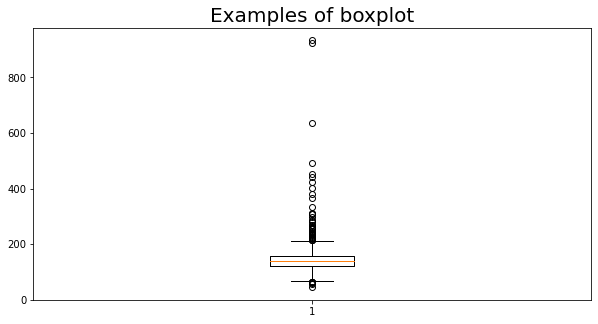

In [178]:
datafile = u'E:\\result.csv'
data = pd.read_csv(datafile,sep=';')
box_1, box_2, box_3 = data['name_list'], data['name_list_1'], data['name_list_2']
 
plt.figure(figsize=(10,5))#设置画布的尺寸
plt.title('Examples of boxplot',fontsize=20)#标题，并设定字号大小
labels = 'name_list_1'#图例
plt.boxplot([box_2])#grid=False：代表不显示背景中的网格线
# data.boxplot()#画箱型图的另一种方法，参数较少，而且只接受dataframe，不常用
plt.show()#显示图像

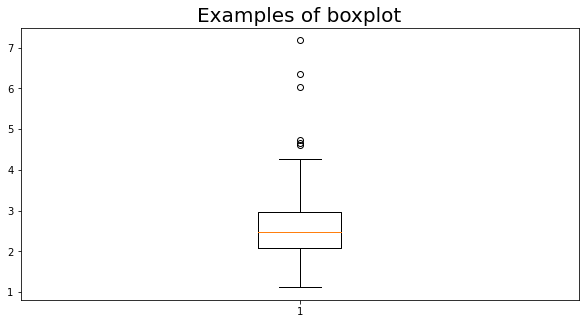

In [179]:
datafile = u'E:\\result.csv'
data = pd.read_csv(datafile,sep=';')
box_1, box_2, box_3 = data['name_list'], data['name_list_1'], data['name_list_2']
 
plt.figure(figsize=(10,5))#设置画布的尺寸
plt.title('Examples of boxplot',fontsize=20)#标题，并设定字号大小
labels = 'name_list_2'#图例
plt.boxplot([box_3])#grid=False：代表不显示背景中的网格线
# data.boxplot()#画箱型图的另一种方法，参数较少，而且只接受dataframe，不常用
plt.show()#显示图像